In [1]:
import pandas as pd #import all necessary libraries
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm

In [2]:
df = pd.read_csv('ArrowrockReservoirElevation.csv', names=['Elevation','Y','M','D'], skiprows=1) #read in csv with Elevation data
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') #Define the datetime format

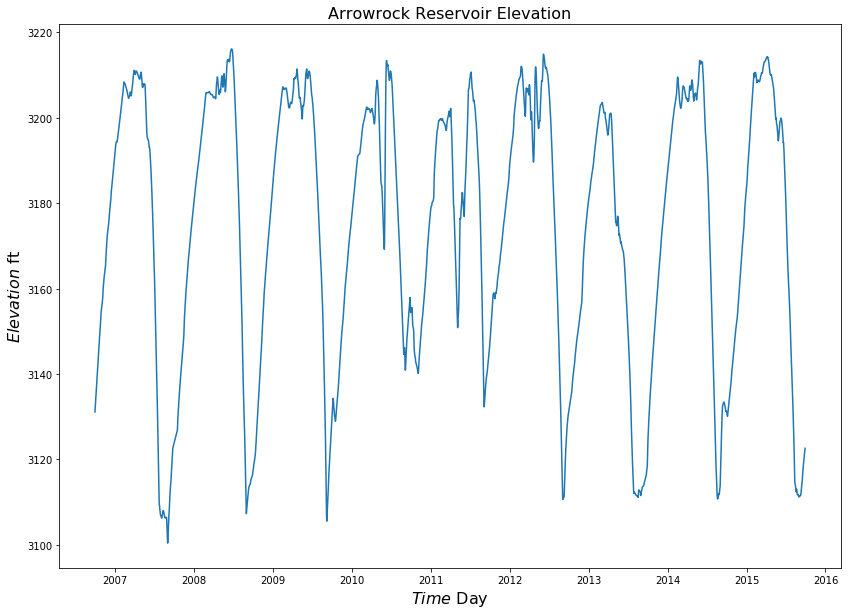

In [16]:
E = df['Elevation'].values #Set variable for Elevation data
Time = df['SerDates'].values #Set variable for Time component of elevation data
Et   = E[1:-1] 
T   = Time[1:-1] 
plt.figure(figsize=(14,10)) #Call figure and plot elevation data over time
plt.plot(T,Et)
plt.title('Arrowrock Reservoir Elevation',fontsize=16)
plt.xlabel('$Time$ Day',fontsize=16)
plt.ylabel('$Elevation$ ft',fontsize=16)
plt.show()

In [9]:
Mean_Elev = np.mean(Et)
Mean_Elev

3173.1115731874147

In [10]:
Var = np.var(Et)
Var

1072.3245782364356

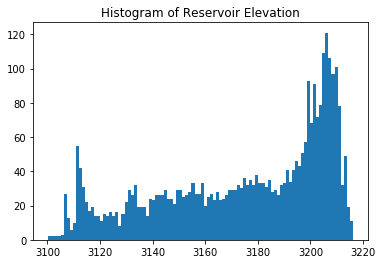

In [14]:
plt.hist(E, bins=100)  # plot histogram of reservoir elevations
plt.title("Histogram of Reservoir Elevation") # add title to histogram
plt.show() #show histogram

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(E)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
# The ADF statistic of the Arrowrock Reservoir elevation dataset is smaller than each of the critical values, 
# indicating that the null hypothesis of non-stationarity is incorrect, thus the dataset is stationary.

ADF Statistic: -5.522391
p-value: 0.000002
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


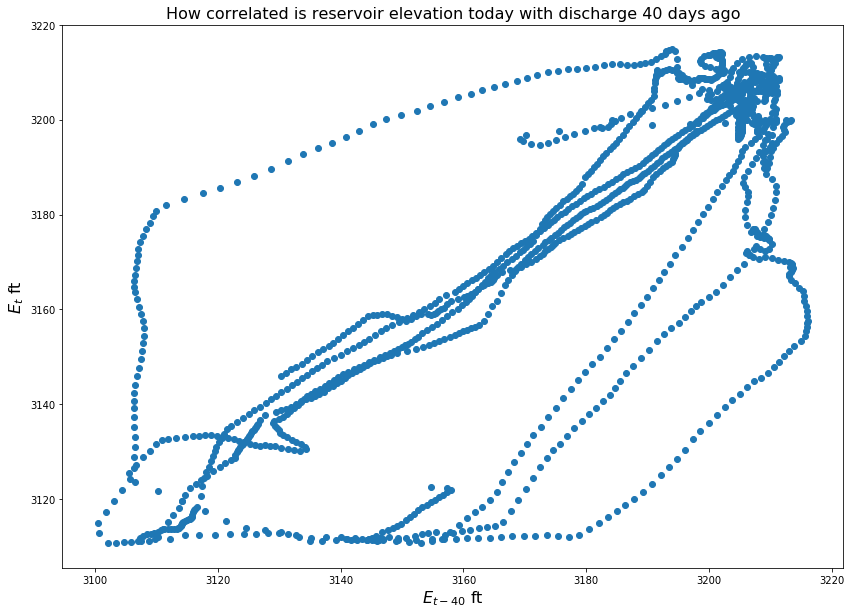

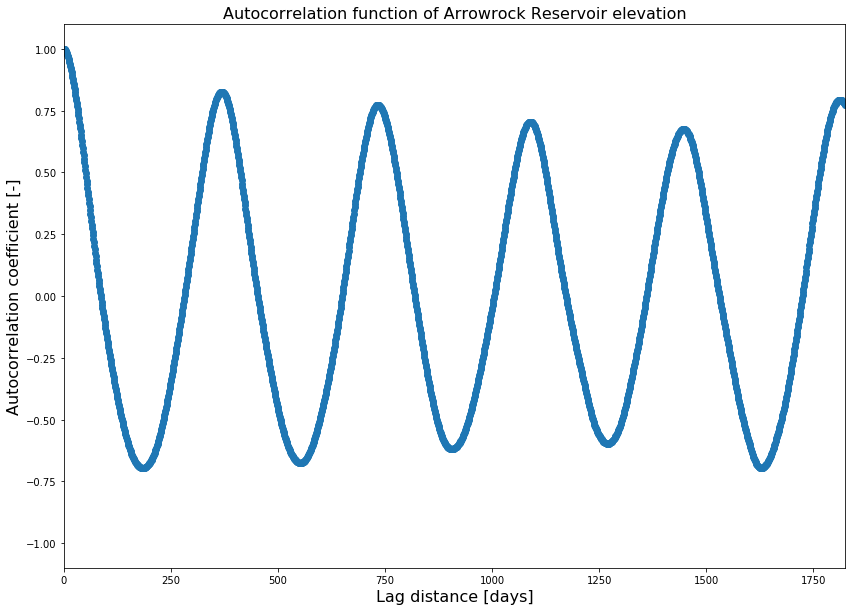

In [18]:
Et   = E[1825:-1] 
Etmk = E[0:-(1826)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Etmk,Et,'o')
plt.title('How correlated is reservoir elevation today with discharge 40 days ago',fontsize=16)
plt.xlabel('$E_{t-40}$ ft',fontsize=16)
plt.ylabel('$E_t$ ft',fontsize=16)
plt.show()

R = np.corrcoef(Etmk,Et)
R[1,0]

Nk = 1825
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    Et   = E[k:-1] 
    Etmk = E[0:-(1+k)]
    R = np.corrcoef(Etmk,Et)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(-1.1,1.1)
plt.title('Autocorrelation function of Arrowrock Reservoir elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

# The autocorrelation of 5 years of data shows that a trend over time is unlikely within these data. 